In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

(-0.5, 1079.5, 1079.5, -0.5)

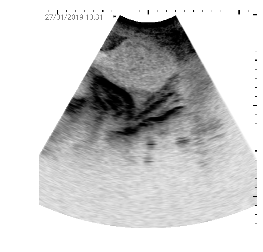

In [65]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

chips = cv2.imread('./af/a.png')
chips_gray = cv2.cvtColor(chips, cv2.COLOR_BGR2GRAY)
plt.imshow(chips_gray,cmap='Greys')
plt.axis('off')

(-0.5, 1079.5, 1079.5, -0.5)

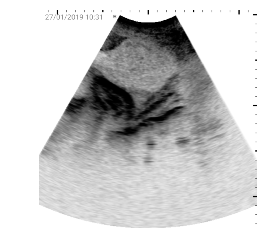

In [66]:
chips_preprocessed = cv2.GaussianBlur(chips_gray, (5, 5), 0)
plt.imshow(chips_preprocessed,cmap='Greys')
plt.axis('off')

In [69]:
def f(th):
    _, chips_binary = cv2.threshold(chips_preprocessed, th, 255, cv2.THRESH_BINARY)
#     chips_binary = cv2.bitwise_not(chips_binary)
    plt.imshow(chips_binary, cmap='Greys')
    plt.axis('off')
    return th 

In [70]:
interact(f, th=widgets.IntSlider(min=100,max=254,step=10,value=100));

interactive(children=(IntSlider(value=100, description='th', max=254, min=100, step=10), Output()), _dom_class…

In [71]:
def g(th):
    _, chips_binary = cv2.threshold(chips_preprocessed, th, 255, cv2.THRESH_BINARY)
    # chips_binary = cv2.bitwise_not(chips_binary)
    chips_contours, _ = cv2.findContours(chips_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    chips_and_contours = np.copy(chips)
    min_chip_area = 60
    large_contours = [cnt for cnt in chips_contours if cv2.contourArea(cnt) > min_chip_area]
    fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
    
    bounding_img = np.copy(chips)
    for contour in large_contours:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cgx = int(rect[0][0])
        cgy = int(rect[0][1])
        leftx = int(cgx - (rect[1][0]/2.0))
        lefty = int(cgy - (rect[1][1]/2.0))
        angle = round(rect[2],1)
        cv2.drawContours(bounding_img,[box],0,(0,0,255),2)
        cv2.circle(bounding_img,(cgx,cgy), 10, (255,0,0), -1)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(bounding_img,'Rot: '+str(angle)+'[deg]',(leftx,lefty), font, 0.7, (0,0,0),2,cv2.LINE_AA)
    plt.imshow(bounding_img)
    plt.axis('off')
    return th

In [72]:
interact(g, th=widgets.IntSlider(min=0,max=254,step=10,value=120));

interactive(children=(IntSlider(value=120, description='th', max=254, step=10), Output()), _dom_classes=('widg…